In [ ]:
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

In [ ]:
pip install praw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.4/189.4 kB 7.7 MB/s eta 0:00:00


In [ ]:
import praw

reddit = praw.Reddit(client_id='v9lV-f7heoHv2QK9sdLZ_g',
                     client_secret='pWuMexrBIkIGTKizHDJFVnDraxUufg',
                     user_agent='janavi86 ')

In [ ]:
headlines = set()

In [ ]:
for submission in reddit.subreddit('politics').new(limit=None):
    headlines.add(submission.title)
    display.clear_output()
    print(len(headlines))

975


In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

pprint(results[:3], width=100)

[{'compound': -0.6249,
  'headline': 'GOP tries to prop up Durham report dud with attack on Adam Schiff',
  'neg': 0.317,
  'neu': 0.683,
  'pos': 0.0},
 {'compound': -0.3818,
  'headline': 'Sen. Tommy Tuberville’s White Nationalism Comments Skewered By Predecessor Who '
              'Prosecuted KKK Members',
  'neg': 0.178,
  'neu': 0.822,
  'pos': 0.0},
 {'compound': -0.4767,
  'headline': 'Florida Passes Bill to Protect Billionaires if Their Exploding Rockets Kill People',
  'neg': 0.272,
  'neu': 0.578,
  'pos': 0.15}]


In [ ]:
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,headline
0,0.317,0.683,0.000,-0.6249,GOP tries to prop up Durham report dud with at...
1,0.178,0.822,0.000,-0.3818,Sen. Tommy Tuberville’s White Nationalism Comm...
2,0.272,0.578,0.150,-0.4767,Florida Passes Bill to Protect Billionaires if...
3,0.000,0.775,0.225,0.4404,Russia bans Ga. secretary of state from countr...
4,0.000,0.488,0.512,0.6369,"DeSantis signs ""medical freedom"" laws"


In [ ]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,neg,neu,pos,compound,headline,label
0,0.317,0.683,0.000,-0.6249,GOP tries to prop up Durham report dud with at...,-1
1,0.178,0.822,0.000,-0.3818,Sen. Tommy Tuberville’s White Nationalism Comm...,-1
2,0.272,0.578,0.150,-0.4767,Florida Passes Bill to Protect Billionaires if...,-1
3,0.000,0.775,0.225,0.4404,Russia bans Ga. secretary of state from countr...,1
4,0.000,0.488,0.512,0.6369,"DeSantis signs ""medical freedom"" laws",1


In [ ]:
df2 = df[['headline', 'label']]
df2.to_csv('reddit_headlines_labels.csv', mode='a', encoding='utf-8', index=False)

In [ ]:
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].headline)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == -1].headline)[:5], width=200)

Positive headlines:

['Russia bans Ga. secretary of state from country. His response? Thanks',
 'DeSantis signs "medical freedom" laws',
 'National popular vote bill passes Nevada legislature',
 'The Internet Dodges Censorship by the Supreme Court',
 'Daniel Cameron wins Republican primary for Kentucky governor']

Negative headlines:

['GOP tries to prop up Durham report dud with attack on Adam Schiff',
 'Sen. Tommy Tuberville’s White Nationalism Comments Skewered By Predecessor Who Prosecuted KKK Members',
 'Florida Passes Bill to Protect Billionaires if Their Exploding Rockets Kill People',
 'Stalled Oregon Legislature hobbles climate action once again — with millions on the line',
 'Tensions flare in ‘weaponization’ panel hearing with sidelined FBI agents']


In [ ]:
print(df.label.value_counts())

print(df.label.value_counts(normalize=True) * 100)

-1    434
 0    336
 1    205
Name: label, dtype: int64
-1    44.512821
 0    34.461538
 1    21.025641
Name: label, dtype: float64


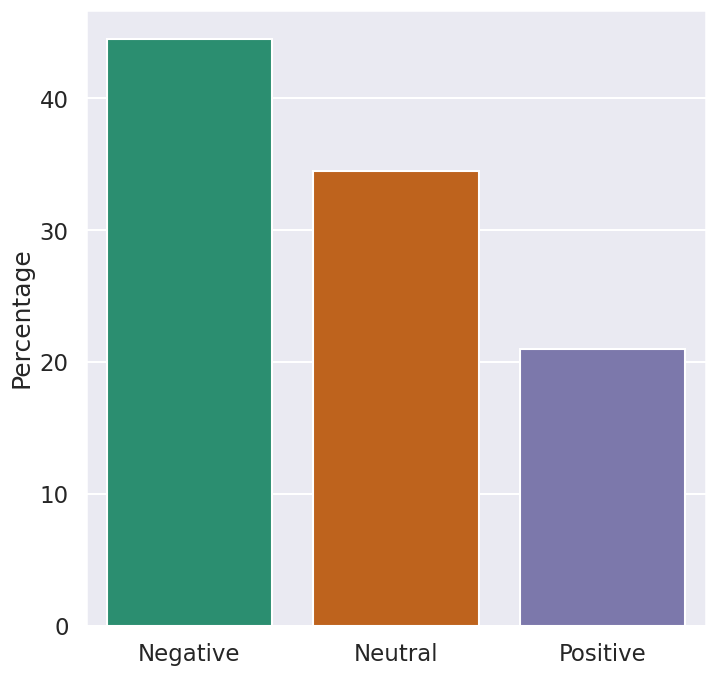

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [ ]:
from nltk.tokenize import word_tokenize, RegexpTokenizer

example = "This is an example sentence! However, it isn't a very informative one"

print(word_tokenize(example, language='english'))

['This', 'is', 'an', 'example', 'sentence', '!', 'However', ',', 'it', 'is', "n't", 'a', 'very', 'informative', 'one']


In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
tokenizer.tokenize(example)

['This',
 'is',
 'an',
 'example',
 'sentence',
 'However',
 'it',
 'isn',
 't',
 'a',
 'very',
 'informative',
 'one']

In [ ]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words[:20])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [ ]:
def process_text(headlines):
    tokens = []
    for line in headlines:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    
    return tokens

In [ ]:
pos_lines = list(df[df.label == 1].headline)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)

[('court', 40),
 ('trump', 36),
 ('supreme', 35),
 ('bill', 20),
 ('gop', 15),
 ('new', 14),
 ('democrats', 14),
 ('2024', 13),
 ('house', 13),
 ('us', 13),
 ('desantis', 12),
 ('biden', 12),
 ('says', 11),
 ('justice', 11),
 ('care', 10),
 ('senate', 10),
 ('republicans', 10),
 ('could', 9),
 ('abortion', 9),
 ('free', 8)]

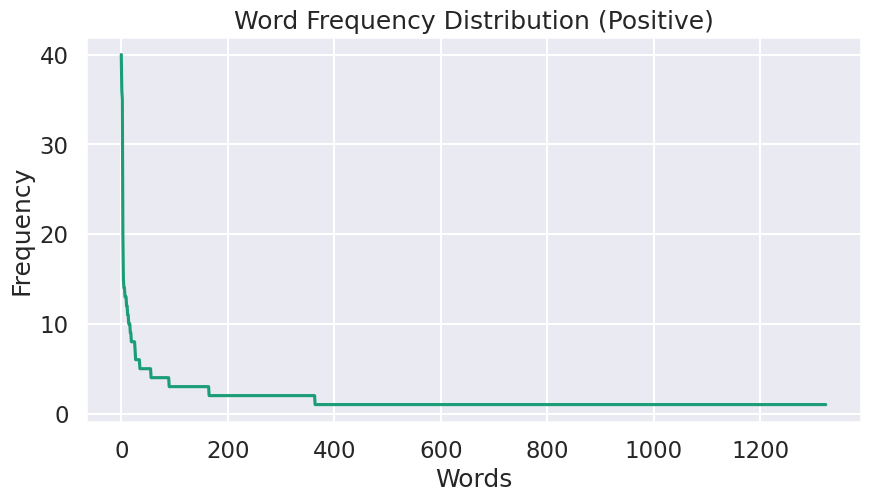

In [ ]:
y_val = [x[1] for x in pos_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

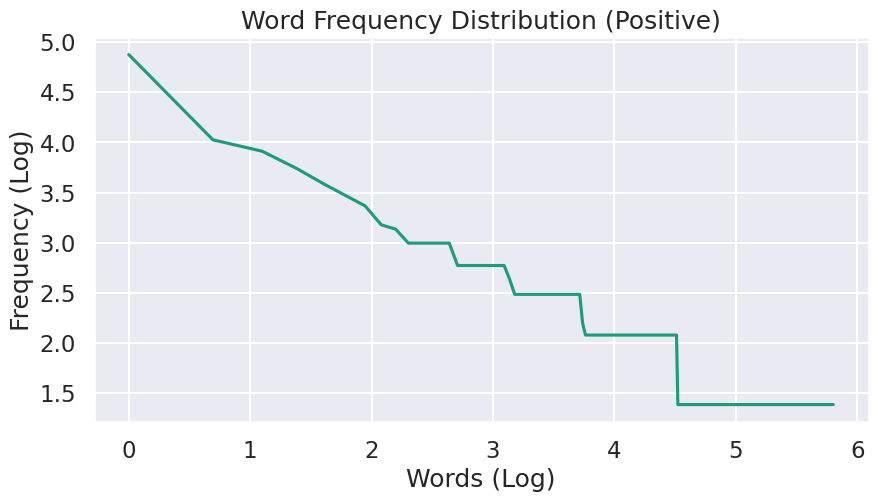

In [ ]:
y_final = []
for i, k, z, t in zip(y_val[0::4], y_val[1::4], y_val[2::4], y_val[3::4]):
    y_final.append(math.log(i + k + z + t))

x_val = [math.log(i + 1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Positive)")
plt.plot(x_val, y_final)
plt.show()

In [ ]:
neg_lines = list(df2[df2.label == -1].headline)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)

[('debt', 82),
 ('biden', 68),
 ('trump', 57),
 ('ceiling', 51),
 ('gop', 47),
 ('desantis', 37),
 ('ban', 31),
 ('says', 29),
 ('abortion', 27),
 ('republicans', 26),
 ('new', 26),
 ('florida', 25),
 ('state', 25),
 ('mccarthy', 25),
 ('us', 23),
 ('talks', 22),
 ('house', 22),
 ('limit', 18),
 ('ron', 18),
 ('santos', 17)]

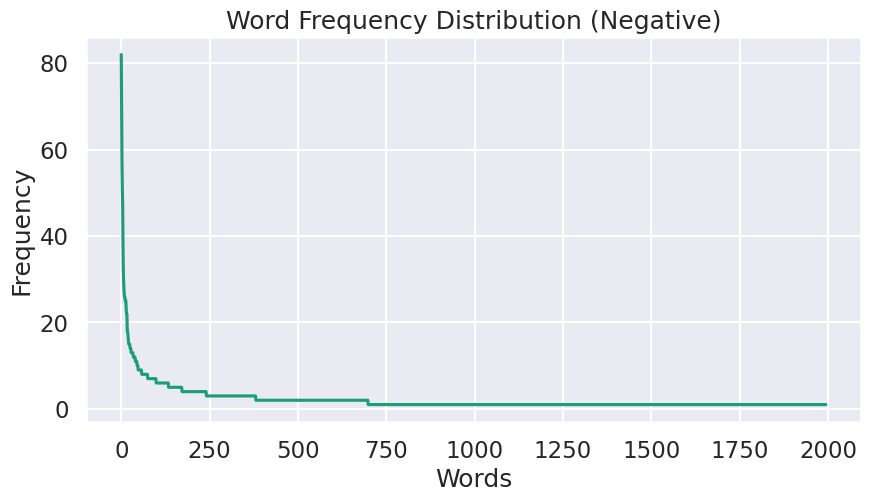

In [ ]:
y_val = [x[1] for x in neg_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()

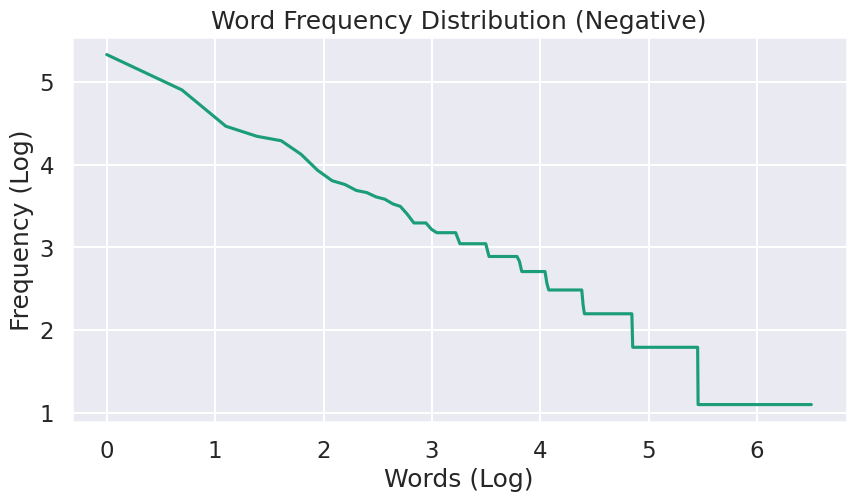

In [ ]:
y_final = []
for i, k, z in zip(y_val[0::3], y_val[1::3], y_val[2::3]):
    if i + k + z == 0:
        break
    y_final.append(math.log(i + k + z))

x_val = [math.log(i+1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Negative)")
plt.plot(x_val, y_final)
plt.show()